Email Spam Filtering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D

For this assignment, we were provided with a given dataset in the form of the email.csv file. It contains a list of randomly chosen emails, labeled as spam or not-spam classification.
After choosing the appropriate libraries to import (and of course, some that will get added as we go), the first thing that needs to be done is properly load the data and examine the built of the dataset.

**1. Download the given dataset.**

- The file contains 5172 rows and 3002 columns.
- The first column contains the name of the email.
- The last column has the prediction 1 for spam, and 0 for not-spam. 

In [4]:
# Load the dataset
df = pd.read_csv("emails.csv")

# Display the basic information
#print(df.info())

# Display descriptive statistics for numerical features in case we wish to find details on the numerical characteristics
#print(df.describe())

In order to move to the next step, we need to make sure that the dataset is clean and needs not preprocessing. 

Therefore, here we have checked:

- Missing Values
- Non-numerical Values
- Non natural numbers (all values should be positive integers as it s the litera counting of words)

In [5]:
# Check for any missing values, using 2 sum to sum both rows and columns 
missing_values = df.isnull().sum().sum() > 0
print("There are missing values:\n", missing_values)

# Check for any non-numerical values, and display False if there is none
non_numerical = df.iloc[1:, 1:].select_dtypes(exclude=['number']).size > 0
print("There are non-numerical values:\n", non_numerical)

# Check for any negative values, and display False if there is none
negative = (df.iloc[1:, 1:] < 0).any().any()
print("There are negative values:\n", negative)

# Check for any non-intiger values, and display False if there is none
integers = df.iloc[1:, 1:].map(lambda x: isinstance(x, int)).all().all()
print("There are not only integer values:\n", not integers)

There are missing values:
 False
There are non-numerical values:
 False
There are negative values:
 False
There are not only integer values:
 False


Even though processes like feature scaling and normalisation are usually applied to numerical data, in this dataset the scale is the same, as we have the literal appearance of a word (count) and there is no feature selection to take place. 

As no missing, negative, non-integer or non-numerical values were found, we can proceed to the next step, needing no pre-processing for this dataset.

**2. Create your own training and validation dataset.**

As we move past the pre-processing, the next step is to split the dataset, in order to get 2 sets: 
- A set for training our model (training data)
- A set for testing the model afterwards (testing data)

Of course first we need to remove the label columns/rows, in order to only split the experimental data.
- Features x are all columns except the first and last
- Last column is the label one, with whether the email is spam or not, so we tag it as y

In [6]:
# Split the dataset into features and label
x = df.iloc[:, 1:-1]  
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**3. Use Keras and/or tensorflow Neural Network API to build two different classifiers to handle this problem.**

The first classifier used is the Multilayer Perceptron (MLP) classifier.
The Sequential class is used for the model architecture, creating a linear stack of 3 dense layers:
- The first layer with input shape of the first layer as a tuple with one element, of 64 units and the ReLU activation function
- The second layer also of 64 units and with eLU function
- The last layer with a single unit with a sigmoid activation function, which is suitable for binary classification tasks.

In [7]:
# Classifier 1: Multilayer Perceptron (MLP)
# Define the model architecture
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='elu'),
    Dense(1, activation='sigmoid')
])

# Compile the first model
model1.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Train the first model
history1 = model1.fit(x_train, y_train, epochs=13, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the first model
test1_loss, test1_acc = model1.evaluate(x_test, y_test)
print('FOR MODEL 1:\n','Test accuracy:', test1_acc)
print('Test loss:', test1_loss)

c:\Users\ficti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7738 - loss: 0.6098 - val_accuracy: 0.9626 - val_loss: 0.1269
Epoch 2/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.0795 - val_accuracy: 0.9771 - val_loss: 0.0989
Epoch 3/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0446 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 4/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0305 - val_accuracy: 0.9746 - val_loss: 0.0968
Epoch 5/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0282 - val_accuracy: 0.9867 - val_loss: 0.0581
Epoch 6/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0107 - val_accuracy: 0.9831 - val_loss: 0.0588
Epoch 7/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.9650 - val_loss: 0.3186
Epoch 8/13
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0072 - val_accuracy: 0.

The second classifier used is the Convolutional Neural Network (CNN) classifier.
The Sequential class is used again for the model architecture, creating a linear stack of 4 dense layers:
- The first layer is a 1D convolutional layer (Conv1D) with 128 filters and a kernel size of 5
- The second layer that follows is a global max pooling layer (GlobalMaxPooling1D) to reduce the dimensionality of the features
- Two dense layers follow, of 64 units, and with relu and eLU function
- The last layer with a single unit with a sigmoid activation function, similarly to the 1st model

In [8]:
# Clasifier 2: Convolutional Neural Network (CNN)
# Define the model architecture
model2 = Sequential([
    Conv1D(128, 10, activation='relu', input_shape=(x_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(64, activation='elu'),
    Dense(1, activation='sigmoid')
])

# Reshape input data for CNN as it is needed for the future functions 
x_train_cnn = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

# Compile the second model
model2.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the second model
history2 = model2.fit(x_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the second model
test2_loss, test2_acc = model2.evaluate(x_test_cnn, y_test)
print('FOR MODEL 2:\n','Test accuracy:', test2_acc)
print('Test loss:', test2_loss)

Epoch 1/20


c:\Users\ficti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7366 - loss: 0.6130 - val_accuracy: 0.7295 - val_loss: 0.5120
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7583 - loss: 0.4884 - val_accuracy: 0.7935 - val_loss: 0.4697
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8057 - loss: 0.4159 - val_accuracy: 0.7874 - val_loss: 0.4077
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8223 - loss: 0.3755 - val_accuracy: 0.7959 - val_loss: 0.3956
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8411 - loss: 0.3494 - val_accuracy: 0.8514 - val_loss: 0.3777
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8370 - loss: 0.3545 - val_accuracy: 0.8164 - val_loss: 0.3763
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8606 - loss: 0.3063 - val_accuracy: 0.7862 - val_loss: 0.4141
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8743 - loss: 0.2884 - val_accuracy: 0.839


Both models have the compile method, specifying the loss function as 'binary_crossentropy', as we deal with a binary problem (1: spam, 0: not spam), including accuracy for evaluation purposes, while the optimiser used is 'nadam', which provided better accuracy and loss results in comparison to 'adam', 'adagrad', 'SGD', 'RMSprop' and 'adadelta'. From the optimisers, most produced a result of accuracy between 0.8-0.7, with the Nadam giving the best results in both models.

The activation functions were also used after experimenting with different ones, training with differently set layers. The final form of the classifiers is the one displayed the most accuracy, without reaching the point of obvious overfitting. 

For training, 13 and 20 epochs are used and batch size is 32 (chosen from trials with different numbers), and with validation split set as 0.2. The validation split indicates that 20% of the training data will be used as validation data to monitor each model's performance during training. Many validation splits were tested, but the balance was best kept at 0.2. 

After training, the models are evaluated on the test data (x_test) and labels (y_test) using the evaluate method.

The accuracy of MLP is higher than the CNN, regardless of the parameters set. The loss is also relatively low, significantly lower in the MLP.

**4. Use your own graphs to compare the classifiers and present your results.**

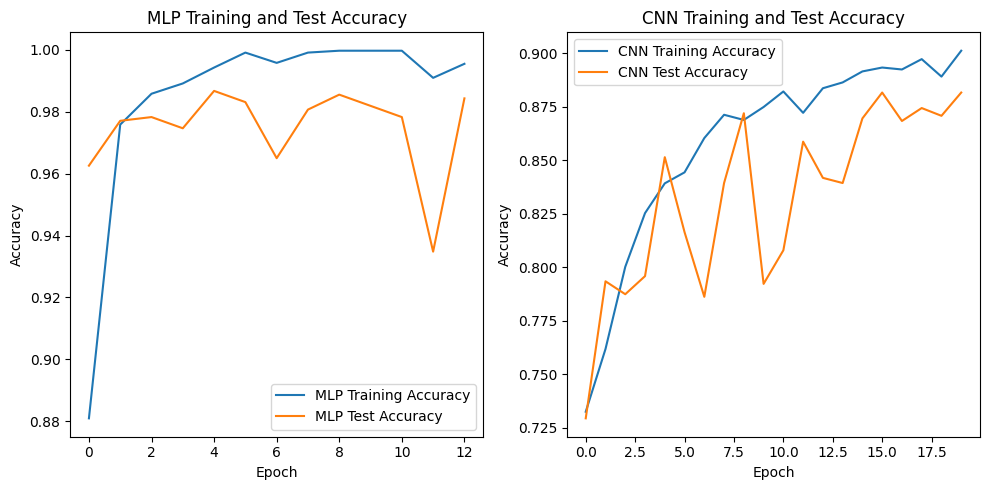

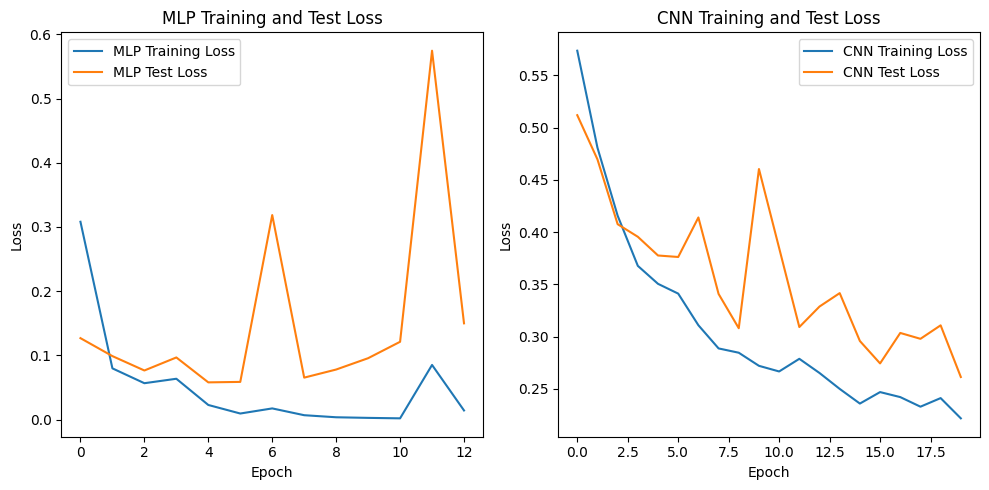

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


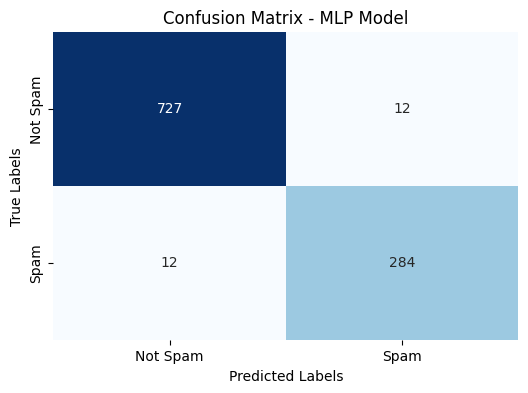

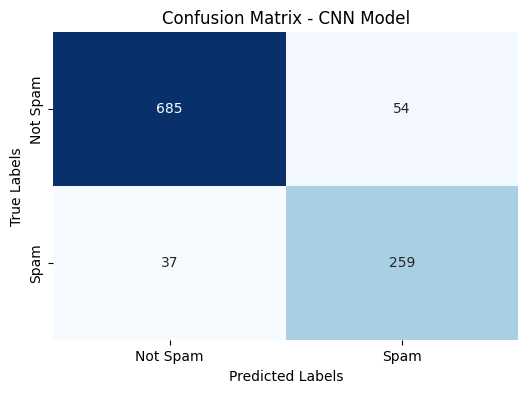

In [9]:
# Plot training history for accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='MLP Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='MLP Test Accuracy')
plt.title('MLP Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='CNN Test Accuracy')
plt.title('CNN Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot training history for loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='MLP Training Loss')
plt.plot(history1.history['val_loss'], label='MLP Test Loss')
plt.title('MLP Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='CNN Training Loss')
plt.plot(history2.history['val_loss'], label='CNN Test Loss')
plt.title('CNN Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate MLP model
probs1 = model1.predict(x_test)
predictions1 = (probs1 > 0.5).astype('int32') 
accuracy1 = accuracy_score(y_test, predictions1)
precision1 = precision_score(y_test, predictions1)
recall1 = recall_score(y_test, predictions1)
f11 = f1_score(y_test, predictions1)

# Evaluate CNN model
probs2 = model2.predict(x_test_cnn)
predictions2 = (probs2 > 0.5).astype('int32') 
accuracy2 = accuracy_score(y_test, predictions2)
precision2 = precision_score(y_test, predictions2)
recall2 = recall_score(y_test, predictions2)
f12 = f1_score(y_test, predictions2)

# Confusion matrix for MLP model
cm1 = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - MLP Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Cnfusion matrix for CNN model
cm2 = confusion_matrix(y_test, predictions2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

From the graphs we can see that the MLP model spikes a higher accuracy with the first epochs, while the CNN model has a smoother ascend in the accuracy. Loss follows a similar rate.

Also, the validation of the CNN shows a lot of instances when the accuracy displays noticable difference than the actual one, supporting even more that the MLP is much more accurate. 

With the help of the confusion matrix, we can see that indeed the 1st classifier (MLP) only fails in a few data, while the 2nd one (CNN) failes in a lot more.

Finally, we calculate the evaluation factors for both models, to have a solid comparison as per the requested ones. 

In [10]:
# Evaluate MLP model
probs1 = model1.predict(x_test)
predictions1 = (probs1 > 0.5).astype('int32') 
accuracy1 = accuracy_score(y_test, predictions1)
precision1 = precision_score(y_test, predictions1)
recall1 = recall_score(y_test, predictions1)
f11 = f1_score(y_test, predictions1)

# Evaluate CNN model
probs2 = model2.predict(x_test_cnn)
predictions2 = (probs2 > 0.5).astype('int32') 
accuracy2 = accuracy_score(y_test, predictions2)
precision2 = precision_score(y_test, predictions2)
recall2 = recall_score(y_test, predictions2)
f12 = f1_score(y_test, predictions2)

# Print evaluation metrics
print("MLP Model Evaluation:")
print("Accuracy:", accuracy1)
print("Precision:",precision1)
print("Recall:", recall1)
print("F1 Score:", f11)
print("\nCNN Model Evaluation:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MLP Model Evaluation:
Accuracy: 0.9768115942028985
Precision: 0.9594594594594594
Recall: 0.9594594594594594
F1 Score: 0.9594594594594594

CNN Model Evaluation:
Accuracy: 0.9120772946859903
Precision: 0.8274760383386581
Recall: 0.875
F1 Score: 0.8505747126436781


As we see, the CNN model once again gives weaker results, while the MLP model provides quick satisfying results.

In [11]:
# Apply the final model to the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print("Final Model: MLP Model")
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9752 - loss: 0.1450
Final Model: MLP Model
Test Accuracy: 0.9768115878105164
Test Loss: 0.15875370800495148


Therefore, for this specific experiment of spam filtering, the best model to use seems to be the **Multilayer Perceptron (MLP)**.